# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def grafica(E,ro,ub="lower right",col='blue'):
    D=1-E
    plt.plot((0.2**2*E**2+0.12**2*D**2+2*0.2*0.12*E*D*ro)**(1/2),label=f'ρ={ro}',color=col)#WE,WD
    plt.legend(loc=ub)
    plt.title('We vs σ')
    plt.xlabel("We")
    plt.ylabel("σ")

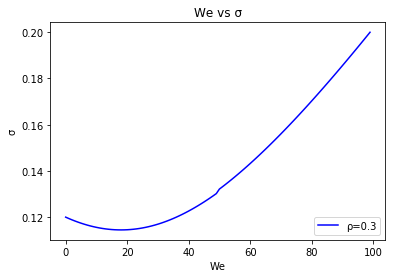

In [3]:
We=np.array([round(i,2) for i in np.linspace(0,1,100)])
grafica(We,0.3)
plt.show()

## Ejercicio 2

In [4]:
listaρ=[-1,-0.4,0,0.3,1]
WE=np.array([round(i,2) for i in np.linspace(-2,2,400)])
colors=["blue","orange","green","red","purple"]

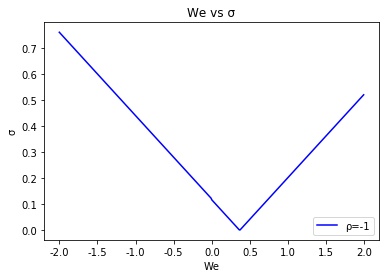

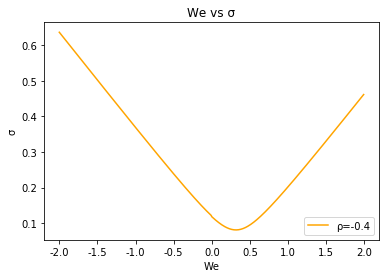

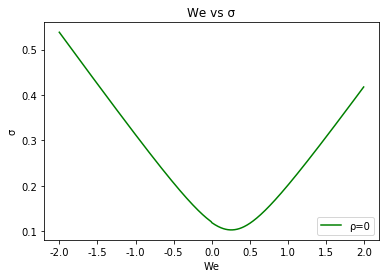

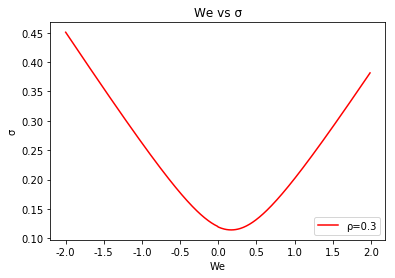

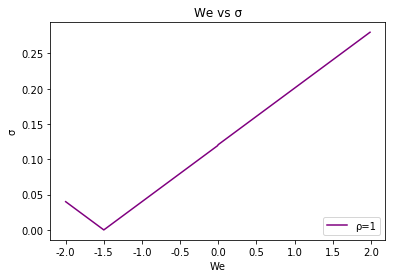

In [5]:
#Graficando por separado
X=np.arange(-2,2.5,0.5)
for ρ,color in zip(listaρ,colors):
    grafica(WE,ρ,col=color)
    plt.xticks(np.linspace(0,400,9),X)
    plt.show()

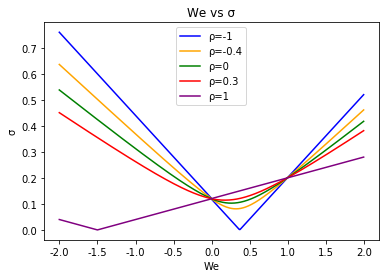

In [6]:
#Juntando las graficas
for ρ,color in zip(listaρ,colors):
    plt.xticks(np.linspace(0,400,9),X)
    grafica(WE,ρ,"upper center",color)

## De una interpretación de la gráfica obtenida 
Entre mayor sea nuestro valor de la We, mayor es el riesgo que vamos a obtener, lo que nos indica que a menor diversificación se corre un mayor riesgo 

**¿Qué efecto tiene el valor 𝜌  de para el valor de $\sigma_{p}$?**

Para los valores que van del cero a uno para nuestra We entre menor sea el valor de la 𝜌, el riesgo es menor tambien, por otro lado para los valores menores a cero y tambien para los valores mayores a uno conforme crece la 𝜌 se va disminuyendo el riesgo


 **¿Qué puede decir de $\sigma_{P}$ en comparación a $\sigma_{D}$y $\sigma_{E}$?**

Cuando se tiene un valor de de We entre cero y uno la $𝜎_{P}$ se encuentra dentro del intervalo $[\sigma_{D}, \sigma_{𝐸}]$

## Demostración
Sean:$X,Y,Z$ tres activos con pesos $w_{x},w_{y},w_{z}$ 

Demodo que la varianza del portafolio es:  $VAR(w_{x}X+w_{y}Y+w_{x}Z)$
<div align="center">
$$=VAR(w_{x}X)+VAR(w_{y}Y)+VAR(w_{z}Z)+2[COV(w_{x}X,w_{y}Y)+COV(w_{x}X,w_{z}Z)+COV(w_{y}Y,w_{z}Z)]$$
$$=w_{x}^2VAR(X)+w_{y}^2VAR(Y)+w_{z}^2VAR(Z)+2w_{x}w_{y}COV(X,Y)+2w_{x}w_{z}COV(X,Z)+2w_{y}w_{z}COV(Y,Z)$$
$$
=w_{x}^2\sigma_{x}^2+w_{y}^2\sigma_{y}^2+w_{z}^2\sigma_{z}^2+2w_{x}w_{y}COV(X,Y)+2w_{x}w_{z}COV(X,Z)+2w_{y}w_{z}COV(Y,Z)
$$
</div>


**Q.E.D**


**¿Por qué las ventas en corto no serían permitidas en la construcción del portafolio?**

Por que incrementan de manera significativa la volatilidad del portafolio 


**¿Cómo se expresa esta regla de forma matemática?**

$0 <= w_{E} <= 1$  y $ w_{D}=1-w_{E}$

# Ejercicio 4

In [7]:
Datos=pd.read_excel('Datos_Tarea4Finanzas2.xlsx')
Columnas=['ELEKTRA', 'GMODELO C', 'KIMBER A', 'KOF L', 'GOOG', 'M_BONOS_171214',
       'S_UDIBONO_251204', 'ORO', 'EURO']

In [8]:
def matrix_std(lista):
    '''Función para poder calcular la matriz de desviaciones estandar'''
    filas=[i for i in range(len(lista))]
    columnas=filas
    matrix=[]
    for fila in filas:
        for columna in columnas:
            if fila==columna:
                matrix.append(round(Datos[lista[fila]].std()*sqrt(252),6))
            else:
                matrix.append(0)
    return [matrix[i:i+len(lista)] for i in range(0,len(matrix),len(lista))]
    

In [9]:
sigma=matrix_std(Columnas)
sigma

[[0.50943, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.274117, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.234634, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0.244355, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.308457, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.042884, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.083725, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.207706, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.119756]]

In [10]:
Lista_Datos=[Datos[columna] for columna in Columnas]
sigma=np.array(sigma)
matρ=np.corrcoef(Lista_Datos)
matρ

array([[ 1.        ,  0.1784586 ,  0.26107747,  0.07998344,  0.05732556,
         0.0131901 ,  0.10235489, -0.14536561, -0.11335337],
       [ 0.1784586 ,  1.        ,  0.20286816,  0.24890013,  0.07271484,
         0.01660387,  0.03424548, -0.07761356, -0.10678304],
       [ 0.26107747,  0.20286816,  1.        ,  0.22751382,  0.0380702 ,
         0.04085074, -0.0166543 , -0.12622937, -0.16602102],
       [ 0.07998344,  0.24890013,  0.22751382,  1.        ,  0.09315253,
         0.11674845,  0.02185693, -0.04004883, -0.10324911],
       [ 0.05732556,  0.07271484,  0.0380702 ,  0.09315253,  1.        ,
        -0.1625436 , -0.12141818,  0.17576237,  0.34444715],
       [ 0.0131901 ,  0.01660387,  0.04085074,  0.11674845, -0.1625436 ,
         1.        ,  0.70069543,  0.19624556, -0.07403999],
       [ 0.10235489,  0.03424548, -0.0166543 ,  0.02185693, -0.12141818,
         0.70069543,  1.        ,  0.12042748, -0.03931105],
       [-0.14536561, -0.07761356, -0.12622937, -0.04004883,  0

In [11]:
#Cálculo de la matriz de varianzas y covarianza
sigma@matρ@sigma.T

array([[ 2.59518925e-01,  2.49205705e-02,  3.12064848e-02,
         9.95648055e-03,  9.00798035e-03,  2.88156086e-04,
         4.36564341e-03, -1.53813781e-02, -6.91538316e-03],
       [ 2.49205705e-02,  7.51401297e-02,  1.30479058e-02,
         1.66717937e-02,  6.14828030e-03,  1.95182330e-04,
         7.85949108e-04, -4.41898590e-03, -3.50538348e-03],
       [ 3.12064848e-02,  1.30479058e-02,  5.50531140e-02,
         1.30442755e-02,  2.75531160e-03,  4.11041951e-04,
        -3.27169171e-04, -6.15177435e-03, -4.66499642e-03],
       [ 9.95648055e-03,  1.66717937e-02,  1.30442755e-02,
         5.97093660e-02,  7.02118649e-03,  1.22339769e-03,
         4.47162720e-04, -2.03263828e-03, -3.02137636e-03],
       [ 9.00798035e-03,  6.14828030e-03,  2.75531160e-03,
         7.02118649e-03,  9.51457208e-02, -2.15010557e-03,
        -3.13569272e-03,  1.12608086e-02,  1.27237317e-02],
       [ 2.88156086e-04,  1.95182330e-04,  4.11041951e-04,
         1.22339769e-03, -2.15010557e-03,  1.839037

# Ejercicio extra

In [12]:
#Grafica E(rp) vs σp
def Grafico_Er_σp(E,ro,col='blue',ub="lower left"):
    D=1-E
    def valor_σp(E,ro):
        return (0.2**2*E**2+0.12**2*D**2+2*0.2*0.12*E*D*ro)**(1/2)
    def valor_Ep():
        return E*0.12+D*0.08
    plt.plot(valor_σp(E,ro),valor_Ep(),label=f"ρ={ro}",color=col)
    plt.title("E(rp) vs σp")
    plt.xlabel("σp")
    plt.ylabel("E(rp)")
    plt.legend(loc=ub)

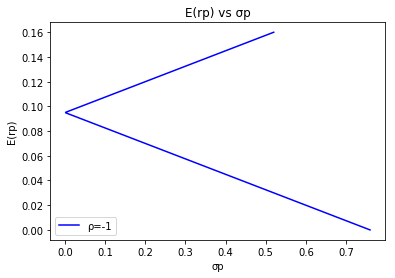

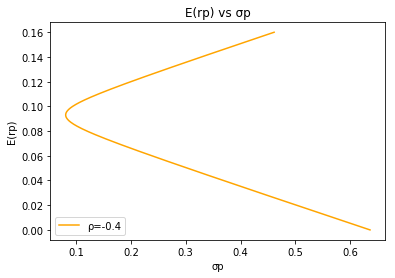

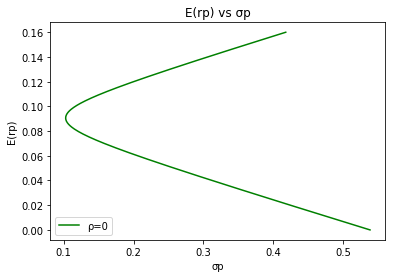

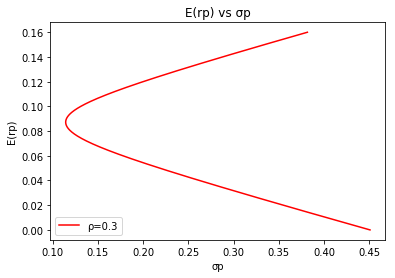

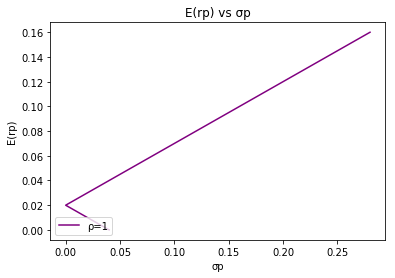

In [13]:
for ρ,color in zip(listaρ,colors):
    Grafico_Er_σp(WE,ρ,color)
    plt.show()

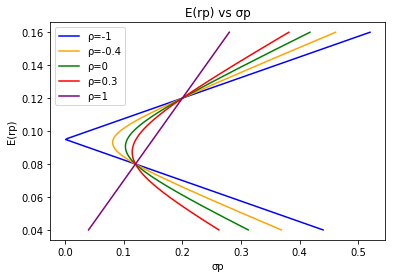

In [14]:
for ρ,color in zip(listaρ,colors):
    Grafico_Er_σp(np.linspace(-1,2,200),ρ,color,"upper left")


#### Interpretación 

Entre menos correlaciónados se encuentre nuestros activos mayor sera el rendimiento, asi mismo en cuanto máyor riesgo se obtrandra un mayor rendimiento, exiten ciertos valores de $\sigma_{p}$ en donde se obtiene el mismo rendimiento para los distintos valores de  $\rho$